# Material
* Primarily from
    * Hands-On Machine-Learning with Scikit-Learn, Keras, and Tensorflow.  Aurelion Geron.
    * Book 2nd Edition, Code 3rd Edition
    * https://github.com/ageron/handson-ml3.git
* Some examples from Andrew Ng and Lawrence Moroney via Coursera/Deeplearning.

# Session's Content
* Very brief Introduction to ANN
    * Perception (scikit-learn)
    * Multi-layer Perception (MLP) (tensorflow)
* Introduction to Tensorflow and Keras
    * Dense layers and Sequential model 

# Perceptron
<img src="images/dse/perceptron.png"
     width="70%"
     alt="Perceptron Architecture"
     style="float: left; margin-right: 10px;" />

# Perceptron (scikit-learn)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [2]:
def show_boundary(X, y, model, custom_cmap=None):
    
    from matplotlib.colors import ListedColormap

    axes = [0, 5, 0, 2]
    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    #custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    plt.figure(figsize=(7, 3))
    plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc="lower right")
    plt.axis(axes)
    plt.show()

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dse"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

[1]


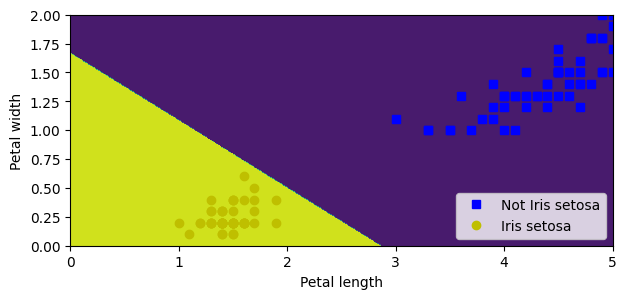

In [4]:
def perceptron_sklearn_example():
    #=====================================================#
    # Load data, will be numpy arrays
    #=====================================================#
    iris = load_iris()
    X = iris.data[:,(2,3)] # petal length, petal width
    y = (iris.target == 0).astype(int) # iris setosa?

    #=====================================================#
    # Create model
    #=====================================================#
    model = Perceptron()
    model.fit(X,y)

    #=====================================================#
    # Predict (more generally evaluate)
    #=====================================================#
    y_pred = model.predict( [[2.0, 0.25]] )
    print(y_pred)
    
    #=====================================================#
    # Understanding, visualize model predictions
    #=====================================================#
    show_boundary(X, y, model)
perceptron_sklearn_example()

Perceptron is similar Logistic Regression, learns linear boundary, but...
* Heaviside step activation makes "hard" decision
* What about multiple units?
* What about multiple layers?
* What about different activation functions?
* What about different loss functions?

# Multi-Layer Perceptron (MLP)
<img src="images/dse/mlp.png"
     width="80%"
     alt="Multi-Layer Perceptron"
     style="float: left; margin-right: 10px;" />

MLP is a type of "feed-forward neural network".
* Can learn non-linear boundaries using different activation functions
* Multi-classification using soft-max activation function at output layer

# Activation Functions
Without non-linear activation functions, neural networks are reduced to finding linear boundaries.  Activation functions are involved in backpropagation that uses gradient of the function to determine how weights need to be changed to minimise the loss function.  Therefore, activation functions need to be differentiable (where evaluated).  Common activation functions are (see https://www.tensorflow.org/api_docs/python/tf/keras/activations):

* sigmoid
* relu
* softmax
* tanh
* linear

Extensive research has been conducted on various activation functions.  The output layer activation function depends on the problem (e.g. softmax for multi-classification, cross-entropy for binary classification, linear for regression).  For the hidden layers, however, rule of thumb is to use the relu activation function.  The function and the deriviative are both trivial making training and predictions computationally faster with good learning rates for many problems.  Though this does restrict the output to be positive which may not be suitable for certain problems (e.g. regression problem that needs to predict negative values).

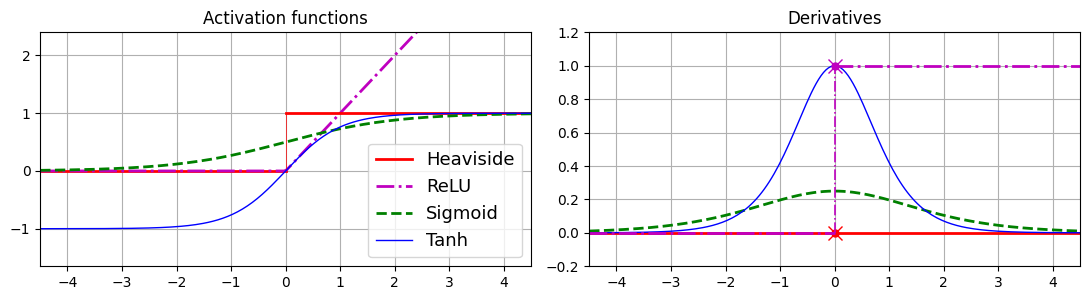

In [5]:
def show_activations():
    # extra code – this cell generates and saves Figure 10–8

    from scipy.special import expit as sigmoid

    def relu(z):
        return np.maximum(0, z)

    def derivative(f, z, eps=0.000001):
        return (f(z + eps) - f(z - eps))/(2 * eps)

    max_z = 4.5
    z = np.linspace(-max_z, max_z, 200)

    plt.figure(figsize=(11, 3.1))

    plt.subplot(121)
    plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
    plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
    plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
    plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
    plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
    plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
    plt.grid(True)
    plt.title("Activation functions")
    plt.axis([-max_z, max_z, -1.65, 2.4])
    plt.gca().set_yticks([-1, 0, 1, 2])
    plt.legend(loc="lower right", fontsize=13)

    plt.subplot(122)
    plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
    plt.plot(0, 0, "ro", markersize=5)
    plt.plot(0, 0, "rx", markersize=10)
    plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
    plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
    plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
    plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
    plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
    plt.plot(0, 1, "mo", markersize=5)
    plt.plot(0, 1, "mx", markersize=10)
    plt.grid(True)
    plt.title("Derivatives")
    plt.axis([-max_z, max_z, -0.2, 1.2])

    save_fig("activation_functions_plot")
    plt.show()
show_activations()

# Deep Learning
What about many more hidden layers betweenn input and output layers?  Definitely more computationally difficult to train.  Any advantages?  Yes!  With careful design multiple layers can "learn higher level" features.  This is known as feature learning and has been tremendous area of research and successful applications.

# Tensorflow
Why do we need tensorflow?
* What about multiple units?
* What about multiple layers?
* What about different activation functions?
* How do we create more complex models?

Answer: Deep learning framework

Why not just use existing libraries to provide framework?  Theano built on numpy. However, progress has been made with libraries using specialised vector representations (often referred to as tensors).  Some common deep learning frameworks include...

* Tensorflow
* PyTorch
* CNTK
* Caffe
* Theano (though not actively maintained)

We use Tensorflow 2.0 here, however, PyTorch is a very strong contender.  A little good news is that learning Tensorflow makes learning PyTorch easier (and visa versa).

# Tensorflow Architecture

Tensorflow ...

* Numerical library based on Eigen, CUDA, NVidia cuDNN 
* CUDA provides access to GPU for fast linear algebra implementations 
* Specialised hardware orders of magnitude faster than software implementations 
* But also, common layers, models, activation, loss functions...
* But also, implementation of backpropagation to learn gradients
* Mostly written in C++

We have to use C++ to use Tensorflow?
* No.  You can but  API's for many languages, Python, Java, Go, etc.

# Keras

What is Keras?

* Keras is an API to Deep Learning Framework(s)
* Provides simplified access to Tensorflow 
* Used to support other DL frameworks: Theano, CNTK 
* Intended to make porting to different DL frameworks easy
* Makes model specification easier 
* PyTorch (sadly) is not supported as a backend 

Keras is the default Python API to TF2.  Keras is installed when you install TF.  Let's see a picture...


# Tensorflow 2.0 Architecture
<img src="images/dse/tf_architecture.png"
     width="80%"
     alt="Tensorflow 2.0 Architecture"
     style="float: left; margin-right: 10px;" />

# Perceptron (tensorflow)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

2022-11-20 07:34:27.709829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 07:34:27.904381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-20 07:34:27.904412: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-20 07:34:27.942218: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-20 07:34:28.699236: W tensorflow/stream_executor/platform/de

2022-11-20 07:34:29.684533: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-20 07:34:29.684583: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 07:34:29.684611: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-virtual-machine): /proc/driver/nvidia/version does not exist
2022-11-20 07:34:29.686750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 79ms/step
y_pred_prob=[[0.10091437]] y_pred=0
3125/3125 [==============================] - 4s 1ms/step


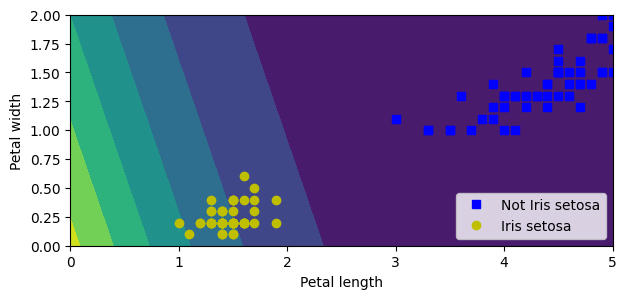

In [7]:
def perceptron_tf():
    #=====================================================#
    # Load data, will be numpy arrays
    #=====================================================#
    iris = load_iris()
    X = iris.data[:,(2,3)] # petal length, petal width
    y = (iris.target == 0).astype(int) # iris setosa?
    
    #=====================================================#
    # Create model
    #=====================================================#
    layer1 = Dense(units=1, activation="sigmoid") # defaults to bias=True
    model = Sequential( layer1 )
    model.compile( optimizer="sgd", loss=BinaryCrossentropy() )
    model.fit(X,y)

    #=====================================================#
    # Evaluate, predictions produce probability because BinaryCrossentropy
    # Note that decision boundary is different than Perceptron
    #=====================================================#
    y_pred_prob = model.predict( [[2, 0.25]] )
    # Make "hard decision", y_pred_prob = [[0.321719]]
    if y_pred_prob[0][0] < 0.5:
        y_pred = 0
    else:
        y_pred = 1
    print(f"y_pred_prob={y_pred_prob} y_pred={y_pred}")

    #=====================================================#
    # Understanding, visualize model predictions
    #=====================================================#
    show_boundary(X, y, model)
perceptron_tf()

# Simple Regression Example with Tensorflow
We will create a dataset with a simple linear relationship between one x feature and the y target. Do not necessarily need tensorflow for this specific example but can certainly extend.  In fact, recurrent neural networks (RNNs) are competitive with traditional time series approaches, such as ARIMA models.

In [8]:
def regression_example():
    #=====================================================#
    # Define the training data: input xs and answers ys
    # dtype clue that TF is not python because most tf.types are c++, not python types
    # The function (aka rule) to map x -> y, y = 2x - 1
    #=====================================================#
    xs = np.array( [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float )
    ys = np.array( [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float )

    #=====================================================#
    # Create model, the input is one data value, model has one neuron, output is one value.
    # All models in TF must have an optimizer and a loss function
    #=====================================================#
    model = keras.Sequential( [keras.layers.Dense(units=1, activation="linear", input_shape=[1])] )
    model.compile( optimizer="sgd", loss="mean_squared_error" )
    # Learn the function that maps x to y
    # Iterate enough times, more usually means better approximation too true function
    model.fit( xs, ys, epochs=500 )
    
    #=====================================================#
    # Evaluate the model to see how well it learned the function
    #=====================================================#
    print( model.predict([10.0]) )
regression_example()

Epoch 1/500
1/1 [==============================] - 0s 220ms/step - loss: 10.9282
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 8.8144
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 7.1469
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 5.8306
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 4.7908
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 3.9685
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 3.3174
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 2.8012
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 2.3912
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0647
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 1.8041
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 1.5954
Epoch 13/500
1/1 [==============================] - 0s 6ms

1/1 [==============================] - 0s 5ms/step - loss: 0.1325
Epoch 105/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1298
Epoch 106/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1271
Epoch 107/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1245
Epoch 108/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1220
Epoch 109/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1195
Epoch 110/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1170
Epoch 111/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1146
Epoch 112/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1123
Epoch 113/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1100
Epoch 114/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1077
Epoch 115/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 116/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 207/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 208/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 209/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 210/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 211/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 212/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 213/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 214/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 215/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 216/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 217/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 218/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 309/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 310/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 311/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 312/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 313/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 314/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 315/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 316/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 317/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 318/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 319/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 320/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 7ms/step - loss: 2.4617e-04
Epoch 408/500
1/1 [==============================] - 0s 4ms/step - loss: 2.4111e-04
Epoch 409/500
1/1 [==============================] - 0s 7ms/step - loss: 2.3616e-04
Epoch 410/500
1/1 [==============================] - 0s 7ms/step - loss: 2.3131e-04
Epoch 411/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2656e-04
Epoch 412/500
1/1 [==============================] - 0s 9ms/step - loss: 2.2191e-04
Epoch 413/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1735e-04
Epoch 414/500
1/1 [==============================] - 0s 10ms/step - loss: 2.1288e-04
Epoch 415/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0851e-04
Epoch 416/500
1/1 [==============================] - 0s 8ms/step - loss: 2.0423e-04
Epoch 417/500
1/1 [==============================] - 0s 6ms/step - loss: 2.0003e-04
Epoch 418/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9592e-04
Epoch

# Image Classification Example
We consider an image multi-classification example.  This model is somewhat simpler than convolutional neural networks (CNNs) that perform very well for this task.  However, it still performs well and is our first example where we have more than one hidden layer.  More generally, this type of model is known as a "feed forward neural network".

There are a large number of parameters (i.e. weights) to learn.  Allows model flexibility to fit the data better, however, this can lead to "overfitting".  Overfitting is undesirable because it fits the training data well but does poorly on the test data.  The test data is a proxy for generalising to unseen data.  So overfitting means the model will not generarlise.

# Fashion MNIST Example
<img src="images/dse/fashion-mnist.png"
     width="80%"
     alt="Fashion MNIST Architecture"
     style="float: left; margin-right: 10px;" />

In [19]:
# helper functions
def show_image( image ):
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.show()

def show_predicted( X_new, y_test, class_names):
    # extra code – this cell generates and saves Figure 10–12
    plt.figure(figsize=(7.2, 2.4))
    for index, image in enumerate(X_new):
        plt.subplot(1, len(y_test), index + 1)
        plt.imshow(image, cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]])
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    save_fig('fashion_mnist_images_plot', tight_layout=False)
    plt.show()

def show_history( history, num_epochs ):
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(history.history).plot(
        figsize=(8, 5), xlim=[0, num_epochs-1], ylim=[0, 1], grid=True, xlabel="Epoch",
        style=["r--", "r--.", "b-", "b-*"])
    plt.legend(loc="lower left")  # extra code
    save_fig("keras_learning_curves_plot")  # extra code
    plt.show()

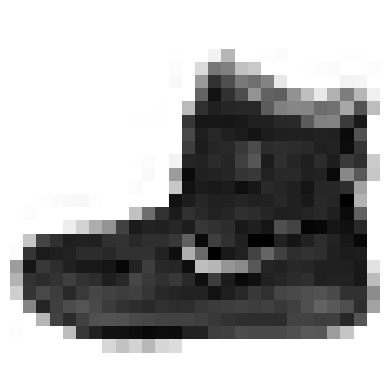

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7415 - accuracy: 0.7545 - val_loss: 0.5133 - val_accuracy: 0.8264
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4950 - accuracy: 0.8288 - val_loss: 0.4691 - val_accuracy: 0.8302
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4466 - accuracy: 0.8439 - val_loss: 0.4269 - val_accuracy: 0.8502
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4206 - accuracy: 0.8530 - val_loss: 0.3999 - val_accuracy: 0.8586
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3993 - accuracy: 0.8600 - val_loss: 0.3980 - val_accuracy: 0.8582
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3827 - accuracy: 0.8647 - val_loss: 0.4003 - val_accuracy: 0.8626
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3698 - accuracy: 0.8700 - val_loss: 0.3775 - val_accuracy:

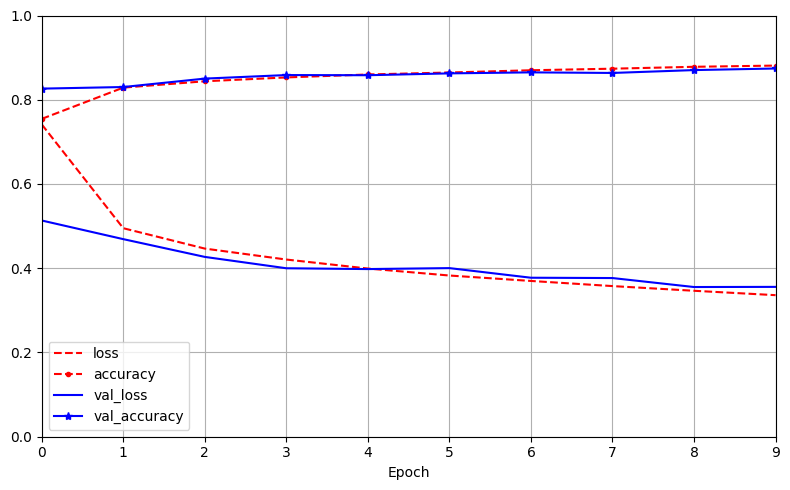

313/313 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8673
[0.37500646710395813, 0.8672999739646912]
1/1 [==============================] - 0s 61ms/step
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sandal' 'Sneaker']


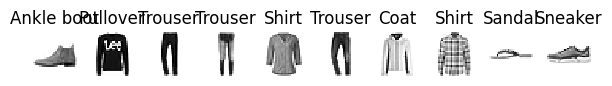

Model Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
def fashion_example():
    #=====================================================#
    # Load data, will be numpy arrays
    #=====================================================#
    fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
    (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
    X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
    X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
    # Scale down pixel values to float in [0.0,1.0]
    X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

    show_image(X_train[0])

    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    #=====================================================#
    # Create model
    #=====================================================#
    tf.random.set_seed(42)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(300, activation="relu"))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    num_epochs = 10
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    print(history.params)
    show_history( history, num_epochs )
    

    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    print( model.evaluate(X_test, y_test) )
    X_new = X_test[:10]
    y_new = y_test[:10]
    y_proba = model.predict(X_new)
    y_proba.round(2)
    y_pred = y_proba.argmax(axis=-1)
    print(np.array(class_names)[y_pred]) # print what was predicted
    show_predicted(X_new, y_new, class_names)
    

    #=====================================================#
    # Understanding, visualize model predictions
    #=====================================================#
    # basic way to visualize the model
    print( "Model Summary" )
    print( model.summary() )
fashion_example()

# Regression MLP
Let's create a more complicated regression model based on the MLP.  Again, the output layer will be one unit with a linear activation function.  The inner layers can have different activations functions (again choose relu for the hidden layers).  The regression problem is to predict California housing prices.  We create the Sequential model but this time by passing a list of layers when we create the model instead of via the model.add(layer) function.

<img src="images/dse/regression_mlp.png"
     width="60%"
     alt="Regression MLP Architecture"
     style="float: left; margin-right: 10px;" />

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def regression_mlp():
    #=====================================================#
    # Load data, load and split the California housing dataset, like earlier
    #=====================================================#
    housing = fetch_california_housing()
    X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
    
    #=====================================================#
    # Create model
    #=====================================================#
    tf.random.set_seed(42)
    norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
    model = tf.keras.Sequential([
        norm_layer,
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
    norm_layer.adapt(X_train)
    history = model.fit(X_train, y_train, epochs=20,
                        validation_data=(X_valid, y_valid))
    
    
    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    mse_test, rmse_test = model.evaluate(X_test, y_test)
    X_new = X_test[:3]
    y_pred = model.predict(X_new)
    print("MSE on test set")
    print( rmse_test )
    print("Predictions on several houses")
    print( y_pred )
    print("Input shape")
    print(X_train.shape[1:])
    print( "Model Summary" )
    print( model.summary() )
    
regression_mlp()

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7950 - root_mean_squared_error: 0.8916 - val_loss: 0.3779 - val_root_mean_squared_error: 0.6147
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3772 - root_mean_squared_error: 0.6142 - val_loss: 1.7758 - val_root_mean_squared_error: 1.3326
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3650 - root_mean_squared_error: 0.6041 - val_loss: 0.3360 - val_root_mean_squared_error: 0.5797
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3346 - root_mean_squared_error: 0.5785 - val_loss: 0.7689 - val_root_mean_squared_error: 0.8769
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3223 - root_mean_squared_error: 0.5677 - val_loss: 0.3232 - val_root_mean_squared_error: 0.5685
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3119 - root_mean_squared_error: 0.5585 - val_loss: 0.2978 - val_

# Regression Sequential

Example that predicts price of a house as before using the sequential model.  Slightly simplified to compare against the functional model.

<img src="images/dse/regression_sequential.png"
     width="50%"
     alt="Regression with Sequential Model"
     style="float: left; margin-right: 10px;" />

In [12]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

def regression_sequential():
    #=====================================================#
    # Load data, load and split the California housing dataset, like earlier
    #=====================================================#
    housing = fetch_california_housing()
    X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
    
    #=====================================================#
    # Create model
    #=====================================================#
    model = tf.keras.Sequential([
        tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(1,  activation="linear")
    ])
    #optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    
    
    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    mse_test, rmse_test = model.evaluate(X_test, y_test)
    X_new = X_test[:3]
    y_pred = model.predict(X_new)
    print("MSE on test set")
    print( rmse_test )
    print("Predictions on several houses")
    print( y_pred )
    print("Input shape")
    print(X_train.shape[1:])
    print( "Model Summary" )
    print( model.summary() )
    
regression_sequential()

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2383.9487 - root_mean_squared_error: 48.8257 - val_loss: 3.5751 - val_root_mean_squared_error: 1.8908
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.3125 - root_mean_squared_error: 1.1456 - val_loss: 3.3563 - val_root_mean_squared_error: 1.8320
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 1.2153 - root_mean_squared_error: 1.1024 - val_loss: 2.5834 - val_root_mean_squared_error: 1.6073
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 1.1964 - root_mean_squared_error: 1.0938 - val_loss: 2.6524 - val_root_mean_squared_error: 1.6286
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 1.1736 - root_mean_squared_error: 1.0833 - val_loss: 2.0989 - val_root_mean_squared_error: 1.4488
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0996 - root_mean_squared_error: 1.0486 - val_loss: 1.5995 - 

# Regression Example with MLP using Functional Model

Same regression architecture as before but this time using the functional model.

In [15]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

def regression_functional():
    #=====================================================#
    # Load data, load and split the California housing dataset, like earlier
    #=====================================================#
    housing = fetch_california_housing()
    X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
    
    #=====================================================#
    # Create model
    #=====================================================#
    input_        = tf.keras.layers.Input(shape=X_train.shape[1:])
    norm_layer    = tf.keras.layers.Normalization()
    hidden1_layer = tf.keras.layers.Dense(30, activation="relu")
    hidden2_layer = tf.keras.layers.Dense(30, activation="relu")
    output_layer  = tf.keras.layers.Dense(1,  activation="linear")
    
    norm_output    = norm_layer(input_)
    hidden1_output = hidden1_layer(norm_output)
    hidden2_output = hidden2_layer(hidden1_output)
    output = output_layer(hidden2_output)
    model = tf.keras.Model(inputs=[input_], outputs=[output])
    
    model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    
    
    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    mse_test, rmse_test = model.evaluate(X_test, y_test)
    X_new = X_test[:3]
    y_pred = model.predict(X_new)
    print("MSE on test set")
    print( rmse_test )
    print("Predictions on several houses")
    print( y_pred )
    print("Input shape")
    print(X_train.shape[1:])
    print( "Model Summary" )
    print( model.summary() )
    
regression_functional()

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 47.0493 - root_mean_squared_error: 6.8592 - val_loss: 2.1964 - val_root_mean_squared_error: 1.4820
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 2.0154 - root_mean_squared_error: 1.4196 - val_loss: 2.0432 - val_root_mean_squared_error: 1.4294
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 7.2749 - root_mean_squared_error: 2.6972 - val_loss: 2.2547 - val_root_mean_squared_error: 1.5016
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 20.5178 - root_mean_squared_error: 4.5297 - val_loss: 153.4558 - val_root_mean_squared_error: 12.3877
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 7.5799 - root_mean_squared_error: 2.7532 - val_loss: 2.6992 - val_root_mean_squared_error: 1.6429
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 28.2648 - root_mean_squared_error: 5.3165 - val_loss: 1.4345 

# Regression with Wide and Deep Architecture using Functional Model

A wide and deep architecture allows simple rules to be learned (via the short path) and more complicated rules (via the deep path).  We cannot use the Sequential model to implement this architecture.  However, Tensorflow's Functional Model provides the flexibility to implement this.

<img src="images/dse/regression_wide_deep.png"
     width="50%"
     alt="Regression Wide and Deep with Functional Model"
     style="float: left; margin-right: 10px;" />

In [16]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

def regression_wide_and_deep():
    #=====================================================#
    # Load data, load and split the California housing dataset, like earlier
    #=====================================================#
    housing = fetch_california_housing()
    X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
    
    #=====================================================#
    # Create model
    #=====================================================#
    input_        = tf.keras.layers.Input(shape=X_train.shape[1:])
    norm_layer    = tf.keras.layers.Normalization()
    hidden1_layer = tf.keras.layers.Dense(30, activation="relu")
    hidden2_layer = tf.keras.layers.Dense(30, activation="relu")
    concat_layer  = tf.keras.layers.Concatenate()
    output_layer  = tf.keras.layers.Dense(1,  activation="linear")
    
    norm_output    = norm_layer(input_)
    hidden1_output = hidden1_layer(norm_output)
    hidden2_output = hidden2_layer(hidden1_output)
    concat_output = concat_layer([norm_output, hidden2_output])
    output = output_layer(concat_output)
    
    model = tf.keras.Model(inputs=[input_], outputs=[output])
    
    model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    
    
    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    mse_test, rmse_test = model.evaluate(X_test, y_test)
    X_new = X_test[:3]
    y_pred = model.predict(X_new)
    print("MSE on test set")
    print( rmse_test )
    print("Predictions on several houses")
    print( y_pred )
    print("Input shape")
    print(X_train.shape[1:])
    print( "Model Summary" )
    print( model.summary() )
    
regression_wide_and_deep()

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 24347.0195 - root_mean_squared_error: 156.0353 - val_loss: 19.7726 - val_root_mean_squared_error: 4.4466
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 2.5850 - root_mean_squared_error: 1.6078 - val_loss: 10.7679 - val_root_mean_squared_error: 3.2815
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 1.3112 - root_mean_squared_error: 1.1451 - val_loss: 9.5024 - val_root_mean_squared_error: 3.0826
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 1.1615 - root_mean_squared_error: 1.0777 - val_loss: 9.0127 - val_root_mean_squared_error: 3.0021
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0549 - root_mean_squared_error: 1.0271 - val_loss: 9.7717 - val_root_mean_squared_error: 3.1260
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 1.0788 - root_mean_squared_error: 1.0387 - val_loss: 7.394

# Saving and Restoring Models

Training typically takes much, much longer than using the model to make predictions.  Common work flow is to train the model once and then use it to make predictions for weeks or months (even years).  How often we re-train depends on how often the data is changing (e.g. mode trained from ten years ago for housing prices is likely poor to predict on housing prices this year).  

After training, we would like to save the model.  Then later we can restore it to make predictions.  There are many parts of the model to save, though, the most important part are the learned weights.  Tensorflow lets us save models in several formats, we choose JSON format here.

In [17]:
# extra code – delete the directory, in case it already exists
import shutil
shutil.rmtree("my_keras_model", ignore_errors=True)

tf.random.set_seed(42)

def create_model():
    #=====================================================#
    # Load data, load and split the California housing dataset, like earlier
    #=====================================================#
    housing = fetch_california_housing()
    X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
    
    #=====================================================#
    # Create model
    #=====================================================#
    input_        = tf.keras.layers.Input(shape=X_train.shape[1:])
    norm_layer    = tf.keras.layers.Normalization()
    hidden1_layer = tf.keras.layers.Dense(30, activation="relu")
    hidden2_layer = tf.keras.layers.Dense(30, activation="relu")
    concat_layer  = tf.keras.layers.Concatenate()
    output_layer  = tf.keras.layers.Dense(1,  activation="linear")
    
    norm_output    = norm_layer(input_)
    hidden1_output = hidden1_layer(norm_output)
    hidden2_output = hidden2_layer(hidden1_output)
    concat_output = concat_layer([norm_output, hidden2_output])
    output = output_layer(concat_output)
    
    model = tf.keras.Model(inputs=[input_], outputs=[output])
    
    model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    
    return model
    
def evaluate_model( model ):
    #=====================================================#
    # Load data, load and split the California housing dataset, like earlier
    #=====================================================#
    housing = fetch_california_housing()
    X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
    
    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    mse_test, rmse_test = model.evaluate(X_test, y_test)
    X_new = X_test[:3]
    y_pred = model.predict(X_new)
    print("MSE on test set")
    print( rmse_test )
    print("Predictions on several houses")
    print( y_pred )
    print("Input shape")
    print(X_train.shape[1:])
    print( "Model Summary" )
    print( model.summary() )
    

#=====================================================#
# Save model
#=====================================================#
model = create_model()
model.save("my_keras_model", save_format="json")

#=====================================================#
# Sometime later, restore model
#=====================================================#
# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)
model = tf.keras.models.load_model("my_keras_model")
evaluate_model(model)


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 358.4262 - root_mean_squared_error: 18.9321 - val_loss: 9.9993 - val_root_mean_squared_error: 3.1622
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 2.3479 - root_mean_squared_error: 1.5323 - val_loss: 7.9687 - val_root_mean_squared_error: 2.8229
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6924 - root_mean_squared_error: 1.3009 - val_loss: 6.3279 - val_root_mean_squared_error: 2.5155
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 1.3398 - root_mean_squared_error: 1.1575 - val_loss: 4.5840 - val_root_mean_squared_error: 2.1410
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 1.1526 - root_mean_squared_error: 1.0736 - val_loss: 3.4389 - val_root_mean_squared_error: 1.8544
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 1.0359 - root_mean_squared_error: 1.0178 - val_loss: 2.6147 - v

# Overfitting and Early Stopping

Overfitting occurs when the training loss continues to decline while the validation loss starts to increase.  Overfitting is highly undesirable as an overfit model only works well on the training data and poorly on unseen data!  One way to address is to detect when this occurs and "stop early".  Tensorflow provides a callback function capability that can be called when training, epoch, or batch has started/stopped.  An early stopping callback is provided that checks at the end of each epoch whether the validation loss is getting any better.  If not, it will stop training and use the best model so far (the best model is the one with the lowest validation loss).  This has two significant advantages

* Saves significant computational resources (can set epochs to high values)
* Mitigates overfitting

The figure below is from the same figure from Fashion MNIST but using 150 epochs.  As can be seen, after about 30-40 epochs, the model begins to perform worse on the validation set.

There are other approaches to address overfitting.  A common approach is "regularization" that applies a penalty to the loss function for overfitting.  You will see various penalties in Tensorflow's fit function (e.g. l2 and l1 are the most typical).

<img src="images/dse/overfitting.png"
     width="70%"
     alt="Overfitting Example"
     style="float: left; margin-right: 10px;" />

Epoch 1/150
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7158 - accuracy: 0.7659 - val_loss: 0.4993 - val_accuracy: 0.8308
Epoch 2/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4834 - accuracy: 0.8319 - val_loss: 0.4558 - val_accuracy: 0.8370
Epoch 3/150
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4386 - accuracy: 0.8459 - val_loss: 0.4220 - val_accuracy: 0.8508
Epoch 4/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4146 - accuracy: 0.8547 - val_loss: 0.3909 - val_accuracy: 0.8594
Epoch 5/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3947 - accuracy: 0.8609 - val_loss: 0.3884 - val_accuracy: 0.8616
Epoch 6/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3794 - accuracy: 0.8666 - val_loss: 0.3919 - val_accuracy: 0.8628
Epoch 7/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3669 - accuracy: 0.8697 - val_loss: 0.3724 - val_ac

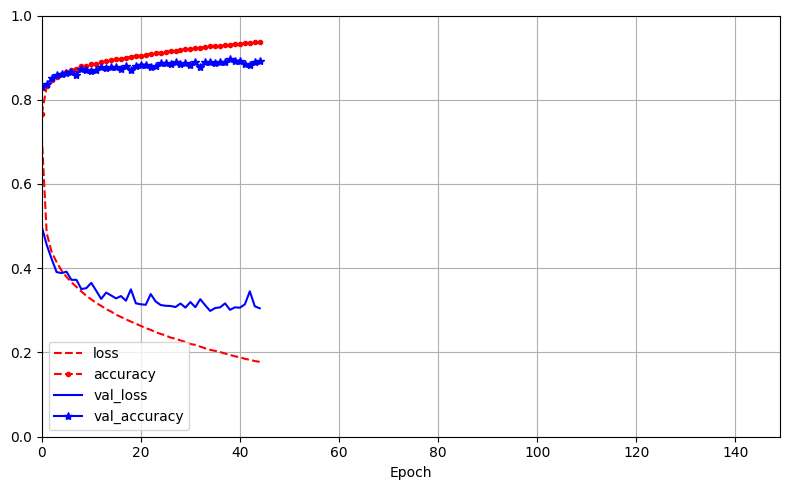

313/313 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8885
[0.3231828212738037, 0.8884999752044678]
1/1 [==============================] - 0s 84ms/step
Model Summary
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [23]:
def early_stopping_example():
    #=====================================================#
    # Load data, will be numpy arrays
    #=====================================================#
    fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
    (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
    X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
    X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
    # Scale down pixel values to float in [0.0,1.0]
    X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

    #show_image(X_train[0])

    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    #checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    #=====================================================#
    # Create model
    #=====================================================#
    tf.random.set_seed(42)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(300, activation="relu"))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    num_epochs = 150
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
    #print(history.params)
    show_history( history, num_epochs )
    

    #=====================================================#
    # Evaluate, predict (more generally evaluate), prob because BinaryCrossentropy
    #=====================================================#
    print( model.evaluate(X_test, y_test) )
    X_new = X_test[:10]
    y_new = y_test[:10]
    y_proba = model.predict(X_new)
    y_proba.round(2)
    y_pred = y_proba.argmax(axis=-1)
    #print(np.array(class_names)[y_pred]) # print what was predicted
    #show_predicted(X_new, y_new, class_names)
    

    #=====================================================#
    # Understanding, visualize model predictions
    #=====================================================#
    # basic way to visualize the model
    print( "Model Summary" )
    print( model.summary() )
early_stopping_example()